In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adults.csv')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As seen in the above table and having a general overview, we can see that `capital.gain` attribute has great investments put in. It reaches maximum of 99999, but it is considered as a market cap.
Having a general look on `hours.per.week`, we can see that minimum number and maximum someone had worked are 1 and 99 respectively. This seems to be an outlier as no one can work this low and gain something or have enough time to work that much as well. And same goes with the `age` attribute. We'll take care of these details while preparing our dataset. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data[data == '>50K. '].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 1.1 Data Preparation

The two class variables that we are going to predict are:
1. income (<= 50K or > 50K)
2. sex (Male of Female)

In [6]:
print('Number of "?" appearing in each column:')
print(data[data == '?'].count())

print('\n*******************\n')

data.replace('?', np.nan, inplace=True)

print('Number of "?" appearing in each column after removing them:')
print(data[data == '?'].count())

Number of "?" appearing in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

*******************

Number of "?" appearing in each column after removing them:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [7]:
# columns having missing values
print('Number of missing instances in each column.')
print(data.isnull().sum())
        
print('\n****************************\n')

for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].value_counts().index[0])
        
print('\n****************************\n')

print('Number of missing instances in each column after filling.')
print(data.isnull().sum())

# for col in data.columns:
#         print(col, '        \t', data[col].isnull().sum())

Number of missing instances in each column.
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

****************************


****************************

Number of missing instances in each column after filling.
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [8]:
print('Number of duplicate rows in the dataset: ', data.duplicated().sum())
print('\nShape of data before removing the duplicate rows: ', data.shape)

# dropping duplicates
data = data.drop_duplicates()
print('\nShape of data after removing the duplicate rows: ', data.shape)


print('\nNumber of duplicate rows after removing the duplicates rows: ', data.duplicated().sum())
data[data.duplicated()]

Number of duplicate rows in the dataset:  24

Shape of data before removing the duplicate rows:  (32561, 15)

Shape of data after removing the duplicate rows:  (32537, 15)

Number of duplicate rows after removing the duplicates rows:  0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


We remove duplicates to avoid any overfiting of the model while training.

We can now see that there are no more duplicate values.


 Maximum age in the data before removing the outliers 90

99.5 quantile of the age :  78.0

Maximum age in the data after removing the outliers is:  77


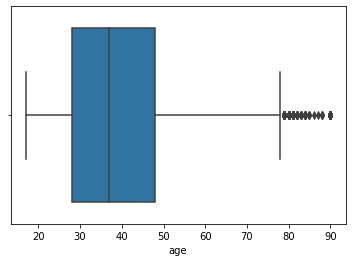

In [9]:
sns.boxplot('age', data=data)

print('\n Maximum age in the data before removing the outliers', data.age.max())

print('\n99.5 quantile of the age : ', data.age.quantile(0.995))

data = data[data.age < data.age.quantile(0.995)]

print('\nMaximum age in the data after removing the outliers is: ', data.age.max())


We can see that for columns `age` any values after `78` seems to be an outlier and it is intuitive because it is very difficult to earn at this stage of the life. Removing these types of outliers can help us clean the data as well as in making good prediction. The maximum `age` in this data set is now `77`.

Maximun value in educaton num:  16
Minimun value in educaton num:  1


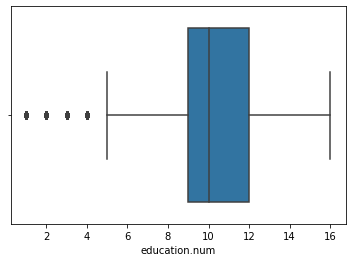

In [10]:
print('Maximun value in educaton num: ', data['education.num'].max())
print('Minimun value in educaton num: ', data['education.num'].min())
sns.boxplot('education.num', data=data)

Here for the `education_num` column we can see that all those adults which have education lower than 5 is an outlier but that can't be the case everytime because there may be people with no education and may be they earn very well. So we won't remove these.

Maximum value of Hours Per Week column before handling the outliers:  99

Minimum value of Hours Per Week column before handling the outliers:  1


Maximum value of Hours Per Week column after handling the outliers:  59

Minimum value of Hours Per Week column after handling the outliers:  16


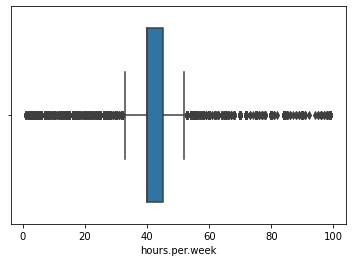

In [11]:
print('Maximum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].min())

sns.boxplot(data['hours.per.week'])

hpw_low = data['hours.per.week'].quantile(0.04)
hpw_high = data['hours.per.week'].quantile(0.93)

data = data[(data['hours.per.week'] > hpw_low) & (data['hours.per.week'] < hpw_high)]

print('\n\nMaximum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].min())

For the `hours.per.week` column, we can see that more 90 percent of the data is treated as outlier and that can't be the case.It is common sense that nobody can work 100 hours per week and is also not common to work for hours betweeen 1 and 10 per week. So for this column we would take values from 15 to 60 hours per week.

As shown in the above cell, the max and the min values now for the `hours.per.week` are `59` and `16` respectively.

In [12]:
data.shape

(28463, 15)

Number of rows has been reduced now due to dropping values from the columns `age` and `hours_per_week` and now at this stage we are having `28463` rows and `15` columns.

In [13]:
correlation = data.corr()

correlation

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.075306,0.031150,0.081406,0.055908,0.117077
fnlwgt,-0.075306,1.000000,-0.048148,-0.005956,-0.010253,-0.014060
education.num,0.031150,-0.048148,1.000000,0.107801,0.074986,0.148723
capital.gain,0.081406,-0.005956,0.107801,1.000000,-0.030466,0.065904
capital.loss,0.055908,-0.010253,0.074986,-0.030466,1.000000,0.051870
hours.per.week,0.117077,-0.014060,0.148723,0.065904,0.051870,1.000000


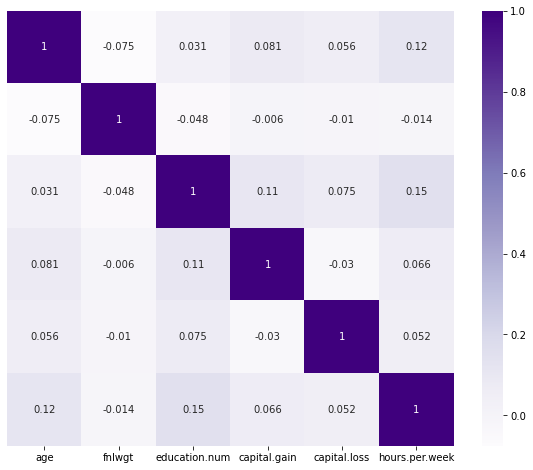

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, yticklabels=False, cmap='Purples')

This heatmap shows there is little to none correlation between attributes due to majority of the boxes are are showing correlation of around 0.5 which is normal. Since the correlation of `capital_gain`, `capital_loss`, and `fnlwgt` are negative with many of the other attributes, so it's better to drop them from the dataset.

In [15]:
data = data.drop('fnlwgt', axis=1)

data.shape

(28463, 14)

In [16]:
data.drop('education', axis=1, inplace=True)
data.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

We have two different columns with same kind of information, `education.num` and `education`. `education` has the values of the education of the adults in string form while `education_num` have those values in integer form. So it is better to have only one of them and drop the other one because both are telling us the same information. We are going to drop `education` because the `education_num` is already in integer form so we won't need to convert it to numerical column as it is already there.

In [17]:
print('Number of individuals that are not from US: ',data[data['native.country']!='United-States'].shape[0])

print('\nNumber of individuals that are from US: ', data[data['native.country']== 'United-States'].shape[0])

Number of individuals that are not from US:  2489

Number of individuals that are from US:  25974


Out of `28463` individuals, `25974` of them are from `United-States` and only `2489` are from `40` other different countries. The sum of all the individuals that are not in `United-States` is `2489` which is very much of a low value as compared to `25974` which are from US. That is why we combined all those who aren't from US to compare it with those who are from US. If we didn't do this then after one hot encoding we will get so many columns from only one column, that is why it is better to combine all other countries and rename it as `Others`.

In [18]:
data['native.country'] = data['native.country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Taiwan', 'India', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Columbia', 'Guatemala', 'Cuba', 'Jamaica', 'Italy',
       'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Ecuador', 'Laos',
       'Hungary', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Thailand'], 'Others')

data['native.country'].value_counts()

United-States    25974
Others            2489
Name: native.country, dtype: int64

In [19]:
data.income   =   data.income.replace({'<=50K': 0, '>50K': 1})
data.sex  =   data.sex.replace({'Female': 0, 'Male': 1})

Replacing both the `income` and `sex` columns with `0s` and `1s`. For the `income` column `0` means `<=50K` and `1` means `>50K` while for the `sex` column `0` is for `female` and `1` is for `male` as both of these will be our final predicting variables for our classification tasks and it is necessary for both of them to be in numerical attribute.

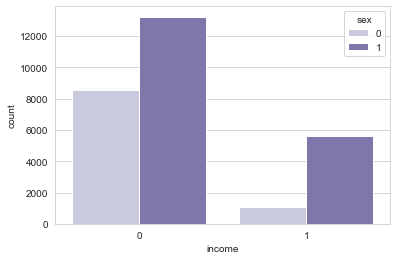

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='income',
    hue='sex',
    data=data,
    palette='Purples')

The above bar chart shows us the distinctions in male and female salary dependent on sexual orientation. We see includes are a lot higher in guys. In the >50k pay, guys indicated a much higher contrast between their female partners, proposing that guys rule that pay gap more so than those in the <=50 salary.

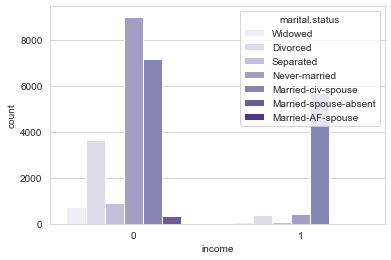

In [21]:
sns.countplot(x='income',
    hue='marital.status',
    data=data,
    palette='Purples')

The above bar chart outline speaks to salary of pay by conjugal status. Fascinating to see a couple of things, leading the <=50k salary of pay most elevated checks originate from the "Never-married" status. This recommends marriage does in reality accompany alot of monetary advantage, as should be obvious is important on the other portion of the outline. As married couples far outclass some other classification includes in the >50k salary of pay. We can affirm this again as the greater part of the divorced, separated , or widowed are situated in the lower pay gap. Recommending that, on the off chance that you need to make over 50k, you should get yourself an accomplice and keep them! For our next graph, Lets split up the age bunches in receptacles of 10 years, and see what sort of salary contrasts we see.

In [22]:
categorical_features = data.select_dtypes(include='object')
numerical_features = data.select_dtypes(exclude='object')

Splitting the `data` into `categorical_features` and `numerical_features`. The `categorical_features` of the data will be converted to dummy variables because all Machine Learning algorithms need numeric data for training as well as testing.

In [23]:
categorical_features.columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'native.country'],
      dtype='object')

In [24]:
numerical_features.columns

Index(['age', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [25]:
one_hot_encoded = pd.get_dummies(categorical_features, prefix_sep=':', drop_first=True)
one_hot_encoded.head()

,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital.status:Married-AF-spouse,marital.status:Married-civ-spouse,marital.status:Married-spouse-absent,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


Converting all the `categorical_features` into dummy variables and dropping the first dummy variable in order convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

In [26]:
#Here is the list of one-hot encoded attributes for clarification

one_hot_encoded.columns

Index(['workclass:Local-gov', 'workclass:Never-worked', 'workclass:Private',
       'workclass:Self-emp-inc', 'workclass:Self-emp-not-inc',
       'workclass:State-gov', 'workclass:Without-pay',
       'marital.status:Married-AF-spouse', 'marital.status:Married-civ-spouse',
       'marital.status:Married-spouse-absent', 'marital.status:Never-married',
       'marital.status:Separated', 'marital.status:Widowed',
       'occupation:Armed-Forces', 'occupation:Craft-repair',
       'occupation:Exec-managerial', 'occupation:Farming-fishing',
       'occupation:Handlers-cleaners', 'occupation:Machine-op-inspct',
       'occupation:Other-service', 'occupation:Priv-house-serv',
       'occupation:Prof-specialty', 'occupation:Protective-serv',
       'occupation:Sales', 'occupation:Tech-support',
       'occupation:Transport-moving', 'relationship:Not-in-family',
       'relationship:Other-relative', 'relationship:Own-child',
       'relationship:Unmarried', 'relationship:Wife',
       'race:As

In [27]:
income_data = pd.concat([numerical_features, one_hot_encoded], axis=1)
sex_data    = pd.concat([numerical_features, one_hot_encoded], axis=1)

income  =   income_data['income']
sex     =   sex_data['sex']

income_data =   income_data.drop('income', axis=1)
sex_data    =   sex_data.drop('sex', axis=1)

We are creating two different datasets, `income_data` and `sex_data`, in order to train the model on them for both the purposes (predicting the `income` and the `sex`). 

We are also making separate seriess of both the `income` and `sex` columns. These serieses (`income` and `sex`) will then be used as the Target Variables. For predicting the income of an individual, `income` series will be used as Target Variable for predicting the `income` and same for the other series i.e `sex` will be used as the Target Variable fro predicting the `sex` of an individual.

Additionally, we are dropping the `income` column from `income_data` and `sex` column from `sex_data` as these two are our Target Variables. The `income_data` will be having the `sex` column and `sex_data` will be having the `income` column because we don't want to lose the information. The other reason of keeping the `sex` column in `income_data` is that it can be an important feature for predicting the income of an individual and also `income` can be an important feature for predicting the `sex` of an individual.

In [28]:
len(income_data.columns) == len(sex_data.columns)

True

In [29]:
'income' in income_data.columns

False

In [30]:
'sex' in sex_data.columns

False

The above few steps are just to calrify that there are no ambigous attributes being carried forwarded to the next major steps of feeding the data to the model.

### 1.2 Describe the final datasets

In [31]:
full_data_income = pd.concat([income_data, income], axis = 1)
full_data_sex = pd.concat([sex_data, sex], axis = 1)

Concatinating `income` column with `income_data` and `sex` column with `sex_data` to make two final datasets, `full_data_income` and `full_data_sex`, for predicting the `income` and the `sex` of an individual respectively.

In [32]:
full_data_income.head(10)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,...,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States,income
2,66,10,0,0,4356,40,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,54,4,0,0,3900,40,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,41,10,0,0,3900,40,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
5,34,9,0,0,3770,45,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
6,38,6,1,0,3770,40,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
7,74,16,0,0,3683,20,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
8,68,9,0,0,3683,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10,45,16,0,0,3004,35,0,0,1,0,...,0,0,1,0,0,1,0,0,1,1
11,38,15,1,0,2824,45,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
12,52,13,0,0,2824,20,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1


In [33]:
full_data_sex.head(10)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,...,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States,sex
2,66,10,0,4356,40,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
5,34,9,0,3770,45,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
6,38,6,0,3770,40,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1
7,74,16,0,3683,20,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
8,68,9,0,3683,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10,45,16,0,3004,35,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
11,38,15,0,2824,45,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
12,52,13,0,2824,20,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


### 2. Modeling and Evaluation

Splitting datasets into their respective training and testing label attributes for feeding it to the model.

In [34]:
income_data = full_data_income.drop(columns=['income'])
income_labels = full_data_income['income']

sex_data = full_data_sex.drop(columns=['sex'])
sex_labels = full_data_sex['sex']

Splitted `full_data_income` into two datasets i.e `income_data` and `income_labels` for feeding it to the model. Same goes for the `full_data_sex` dataset as well.

The Classifiers we will be using are <br>
1. Support Vector Classifier
2. K-Nearest Neighbours
3. Random Forest Classifier

#### Why Support Vector Classifier?

The support vector machine is a classifier that speaks to the training information as points in space isolated into classifications by a hole as wide as could be expected under the circumstances. New points are then added to space by foreseeing which class they fall into and which space they will have a place with. 
It utilizes a subset of training data in the choice capacity which makes it memory proficient and is exceptionally powerful in high dimensional spaces. The main disadvantage with the support vector machine is that the algorithm doesn't straightforwardly give likelihood estimates.


#### Why K-Nearest Neighbours?

It is an lazy learning algorithm that stores all instances relating to training information in n-dimensional space. It is a languid learning calculation as it doesn't zero in on building an overall inner model, rather, it deals with putting away cases of training data. 
This algorithm is a very straightforward in its execution and is hearty to uproarious training information. Regardless of whether the training information is huge, it is very effective. The main inconvenience with the KNN calculation is that there is no compelling reason to decide the estimation of K and computation cost is pretty high contrasted with different other algorithms.


#### Why Random Forest Classifier?

Random decision trees or random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.
The advantage of the random forest is that it is more accurate than the decision trees due to the reduction in the over-fitting. The only disadvantage with the random forest classifiers is that it is quite complex in implementation and gets pretty slow in real-time prediction.

Random decision trees or random forest are an ensemble learning strategy for classification, grouping, and so forth It works by developing a huge number of decision trees at training time and yields the class that is the method of the classes or classification or mean prediction(regression) of the individual trees. 
The benefit of the random forest is that it is more precise than the decision trees because of the decrease in the over-fitting. The main drawback with the random forest classifiers is that it is very perplexing in execution and gets pretty delayed in realtime prediction.

### Task 1 - Predicting the Income (>50k/<=50k)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(income_data, income_labels, test_size =0.2, random_state = 42)

We have used `train_test_split` because our data is randomly placed and it doesn’t have a general data of varying ratio in attributes to use `stratifiedshufflesplit` instead.

Instantiating classifiers in the below cell.

In [37]:
clf_svc = SVC()
clf_knn =  KNeighborsClassifier()
clf_rforest = RandomForestClassifier()

In [38]:
classifiers = ['Support Vector Classifier', 'K-Nearest Neighbours', 'Random Forest Classifier']

models = {clf_svc:'Support Vector Classifier',
          clf_knn:'K-Nearest Neighbours',
          clf_rforest: 'Random Forest Classifier'}

In [43]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score


def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("---------------------------------------")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("-----------------------------------------")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------Support Vector Classifier---------------------------------------------------
Accuracy Score for Support Vector Classifier: 81.1699%
Null Accuracy: 76.9717%
Confusion Matrix
[[4275  107]
 [ 965  346]]
---------------------------------------
Accuracy Score: 81.1699%
Recall Score: 26.3921%
Specificity Score: 97.5582%
False Positive Rate: 2.4418%
Precision Score: 76.3797%
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4382
           1       0.76      0.26      0.39      1311

    accuracy                           0.81      5693
   macro avg       0.79      0.62      0.64      5693
weighted avg       0.80      0.81      0.77      5693

--------------------------------------------K-Nearest Neighbours---------------------------------------------------
Accuracy Score for K-Nearest Neighbours: 84.8586%
Null Accuracy: 76.9717%
Conf